In [1]:
import numpy as np  # lineare algebra
from sklearn.metrics import plot_confusion_matrix
from sklearn import datasets # Einbinden des iris Datensets
iris = datasets.load_iris() # Zuweisung des iris datensets zu einer Variable
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


In [2]:
X = iris.data[:, :2]  # sepal width und sepal length
y = iris.target
class_names = iris.target_names

steps = .002  # Platz zwischen einzelnen Werten 
i = [1, 3, 15] # i steht für die drei gegebenen Klassifikatoren 1, 3, 15
split = [0.3, 0.1] # Train-Test Split (70%-30%, 90%-10%)

# Erstellung von Farbpalletten zur Darstellung (Hintergrund und Ergebnisse)
backround = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF']) 
training_points = ListedColormap(['#a30b0b', '#089e08', '#006ea6'])

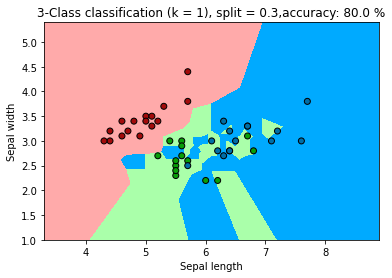

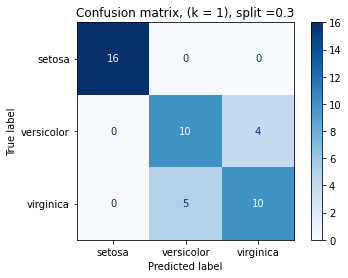

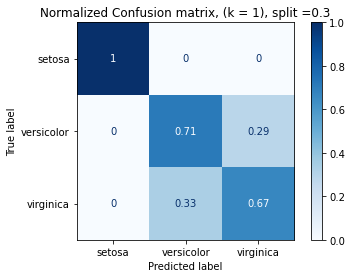

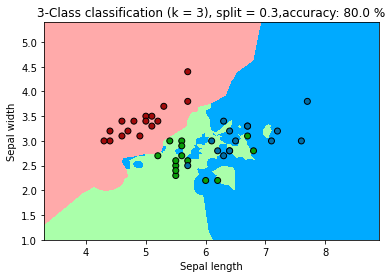

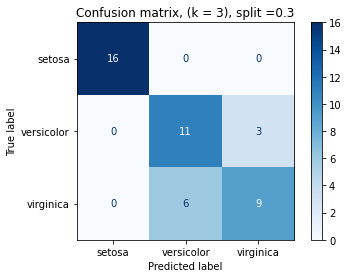

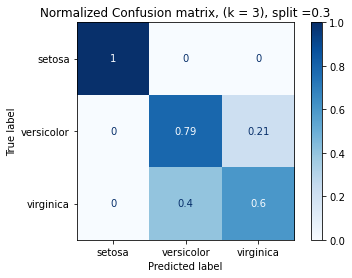

KeyboardInterrupt: 

In [3]:
# es werden Trainings und Testsätze für jede Kombination aus Trainings, Test und Klassifikatoren erstellt sowie deren Nachbarn ermittelt. Es sind 6 Kombinationen möglich
for r in split:
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=r, random_state=40) # Random State, für vergleichbare Werte
    for x in i:
        neigh = KNeighborsClassifier(n_neighbors=x,
        weights='distance')
        neigh.fit(X_train, y_train)

        # berechnen von min, max. und Limits um den Meshgrid zu erstellen. Dieser ist mitunter für unsere Vorhersage verantwortlich
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, steps),
                                 np.arange(y_min, y_max, steps))

            # Das Ergebnis wird für eine farbige Grafik aufbereitet
        pred = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
        pred = pred.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, pred, cmap=backround, shading='auto')

        # Darstellung der Trainierten Punkte und deren Genauigkeit
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=training_points, edgecolors='#000000')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.title(f"3-Class classification (k = {x}), split = {r},accuracy: {round(neigh.score(X_test, y_test)*100, 2)} %")
        plt.show()
        
        titles_options = [("Confusion matrix, (k = "+str(x)+"), split ="+str(r), None),
                  ("Normalized Confusion matrix, (k = "+str(x)+"), split ="+str(r), 'true')]
        for title, normalize in titles_options:
            disp = plot_confusion_matrix(neigh, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()


